In [1]:
using Gurobi, JuMP, PyPlot

# Solution 1:  The Huber loss. 
In statistics, we frequently encounter data sets containing outliers, which are bad data points arising from experimental error or abnormally high noise. Consider for example the following data set consisting of 15 pairs (x, y).

<b><u>Solution 1a:</u></b> Compute the best linear fit to the data using an l2 cost (least squares). In other words, we are looking for the a and b that minimize the expression:

\begin{equation*}
l_2 cost : \sum_{i=1}^{15}  (y_i - ax_i - b)^2
\end{equation*}

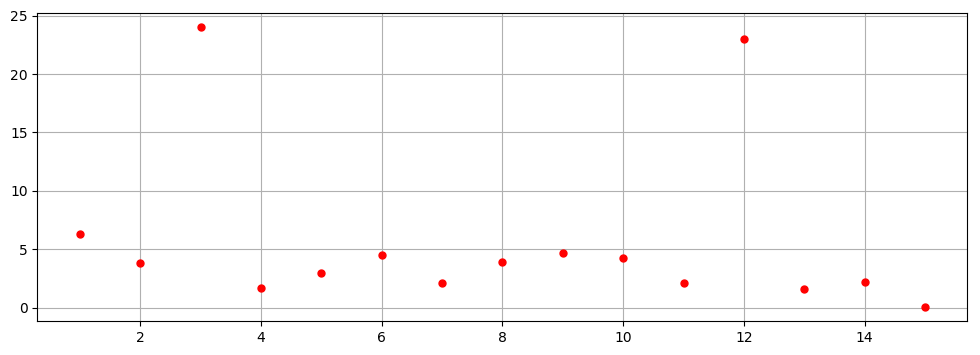

15

In [2]:
# define (x,y) coordinates of the points
x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 ]
y = [ 6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02 ]

using PyPlot
figure(figsize=(12,4))
plot(x,y,"r.", markersize=10)
grid("on")

len_x = length(x)

In [3]:
m1a = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m1a, a)
@variable(m1a, b)
@objective(m1a, Min, sum( (y[i] - a*x[i] - b).^2 for i in 1:length(x) ))
status = solve(m1a)
val_a = getvalue(a)
val_b = getvalue(b)
println(status)
println(val_a)
println(val_b)

Optimal
-0.29078571428551947
8.130285714279665


In [6]:
# Calculating values of y based on the values of a and b that we have learned from above and using the x coordinate 
# values
y1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i = 1:length(x)
    y1[i] += (val_a * x[i]) + val_b
end

In [7]:
# Removing the outliers this time.
x2 = [ 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15 ]
y2 = [ 6.31, 3.78, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 1.58, 2.17, 0.02 ]

m1a1 = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m1a1, a)
@variable(m1a1, b)
@objective(m1a1, Min, sum( (y2[i] - a*x2[i] - b).^2 for i in 1:length(x2) ))
status = solve(m1a1)
val_a1 = getvalue(a)
val_b1 = getvalue(b)
println(status)
println(val_a1)
println(val_b1)

Optimal
-0.23648422408233874
4.9916033483557305


In [8]:
# Getting the y values after removing the outlier and based on new values of a and b (without outliers)
x2 = [ 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15 ]
y2 = [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ]
for i = 1:length(x2)
    y2[i] += (val_a1 * x2[i]) + val_b1
end

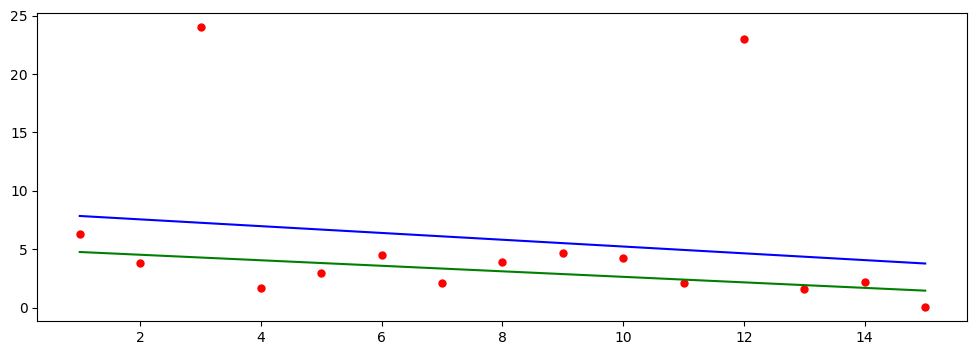

Blue line is when we consider outliers 3 and 12 points
Green line is when we DON'T consider outliers 3 and 12 points


In [10]:
figure(figsize=(12,4))
plot( x, y, "r.", markersize=10)
plot( x, y1, "b-")
plot( x2, y2, "g-")
println("Blue line is when we consider outliers 3 and 12 points")
println("Green line is when we DON'T consider outliers 3 and 12 points")

<b>Explanation: </b> We can see that when outliers are not considered the plot is more close to the rest of the points (Green line) than when we consider the outliers (blue line). This is because the best linear fit using l2 (least squares) in blue line is trying to consider the points which are far above as well. 

<b><u>Solution 1b:</u></b> It’s not always practical to remove outliers from the data manually, so we’ll investigate ways of automatically dealing with outliers by changing our cost function. Find the best linear fit again (including the outliers), but this time use the l1 cost function:

\begin{equation*}
l_1 cost : \sum_{i=1}^{15}  |y_i - ax_i - b|
\end{equation*}

In [11]:
using JuMP, ECOS
x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 ]
y = [ 6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02 ]

m1b = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m1b, a1)
@variable(m1b, b1)
@variable(m1b, t[1:length(x)])
@expression(m1b, S1[i=1:length(x)], (y[i] - a1*x[i] - b1))

@constraint(m1b, S1 .<= t)
@constraint(m1b, S1 .>= -t)

@objective(m1b, Min, sum(t))
            
status = solve(m1b)
val_a2 = getvalue(a1)
val_b2 = getvalue(b1)
println(status)
println("Value of a: ", val_a2)
println("Value of b: ", val_b2)

Optimal
Value of a: -0.35599999999999987
Value of b: 6.6659999999999995


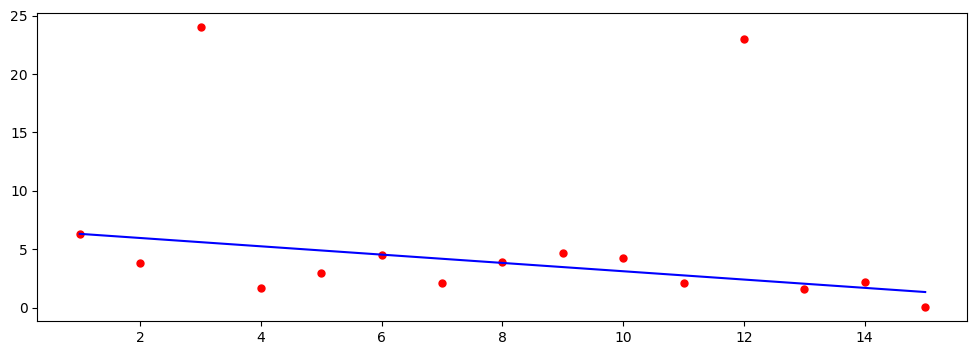

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x326409b90>

In [12]:
y1b = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i = 1:length(x)
    y1b[i] += (val_a2 * x[i]) + val_b2
end
figure(figsize=(12,4))
plot( x, y, "r.", markersize=10)
plot( x, y1b, "b-")

<b>Explanation: </b> Using the cost function l1 and considering outliers this time we see the above plot. We can see that the above linear fit doesn't do better than least squares that was used in Solution 1a. This plot seems to be not considering outliers because of the defined l1 cost function. 

<b><u>Solution 1c: </u></b> Another approach is to use an l2 penalty for points that are close to the line but an l1 penalty for points that are far away. Specifically, we’ll use something called the Huber loss.

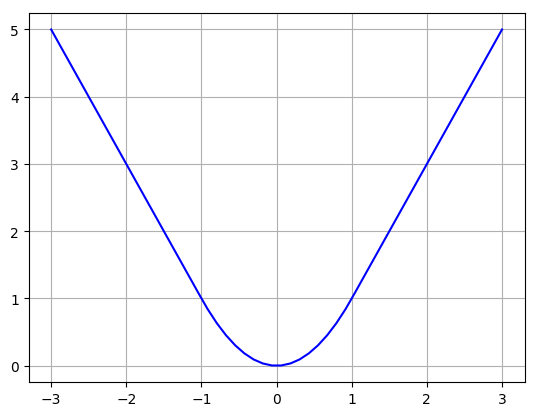

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3294aec10>

In [229]:
function huber_loss(x)
    M = 1
    m1c = Model(solver=GurobiSolver(OutputFlag=0))
    @variable(m1c, v >= 0)
    @variable(m1c, w <= M) # Given M = 1
    
    @constraint(m1c, x <= (w + v))
    @constraint(m1c, x >= -(w + v))
    
    @objective(m1c, Min, (w^2 + 2 * M * v))
    solve(m1c)
    return getobjectivevalue(m1c)
end

x = linspace(-3, 3)
y = [huber_loss(items) for items in x]

grid("on")
plot( x, y, "b", label="Huber Loss Sol 1c")

In [252]:
M = 1
m1c1 = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m1c1, a1c)
@variable(m1c1, b1c)
@variable(m1c1, w[1:len_x] <= 1)
@variable(m1c1, v[1:len_x] >= 0)

@constraint(m1c1, y - a1c * x - b1c .<= (w + v))
@constraint(m1c1, y - a1c * x - b1c .>= -(w + v))

@objective(m1c1, Min, sum(w.^2 + 2 * M * v))
status = solve(m1c1)
println(status)

aopt = getvalue(a1c)
bopt = getvalue(b1c)

println("Value of a: ", aopt)
println("Value of b: ", bopt)

Optimal
Value of a: -0.2811079944792559
Value of b: 5.738120618207082


In [251]:
solve(m1c1)

:Optimal

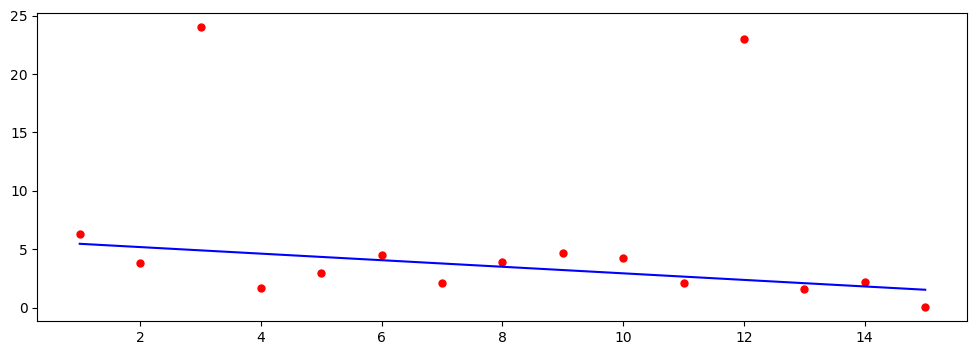

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323440710>

In [254]:
x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 ]
y1c = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i = 1:length(x)
    y1c[i] += (aopt * x[i]) + bopt
end
figure(figsize=(12,4))
plot( x, y, "r.", markersize=10)
plot( x, y1c, "b-")